# Face Recognition

### Initialization

## HOG features


In [5]:
# Installing the necessary packages - Opencv
! pip install opencv-python

     |████████████████████████████████| 52.6 MB 3.8 MB/s eta 0:00:01     |███████▌                        | 12.4 MB 5.0 MB/s eta 0:00:09


In [20]:
!git clone git://github.com/ageitgey/face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 874, done.
remote: Total 874 (delta 0), reused 0 (delta 0), pack-reused 874
Receiving objects: 100% (874/874), 101.46 MiB | 2.82 MiB/s, done.
Resolving deltas: 100% (506/506), done.


In [7]:
# Installing the necessary packages - Scikit Image
pip install scikit-image

     |████████████████████████████████| 12.2 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 6.9 MB/s eta 0:00:01
  Using cached Pillow-7.2.0-cp38-cp38-macosx_10_10_x86_64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing necessary tools
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import data, exposure
import face_recognition
import scipy


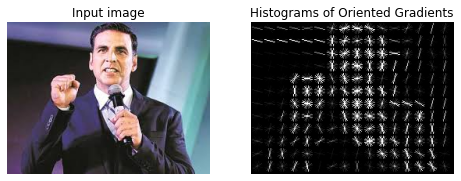

In [2]:
# Reading image from the disk
image = cv2.imread("AK.jpeg")
# # Displays the image
# cv2.imshow("Output", image)
# # Adds a delay
# cv2.waitKey(0)

# Open Cv reads image in BGR format, hence converting the colours
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting to RGB format

# fd - feature descriptor (the histogram, which describes the orientations)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(1,1), visualize=True, multichannel=True)

# Plotting the input and hog image
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis("off")
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescaling histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histograms of Oriented Gradients")
plt.show()

In [3]:
len(fd)

1536

In [4]:
image.shape

(194, 260, 3)

### Face Detection

In [2]:
# importing necessary tools (Rectangle and Circle to draw and indicate over image the face)

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle



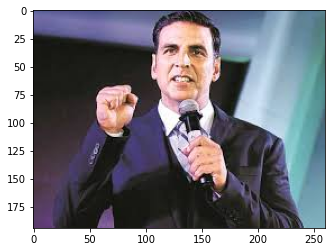

In [6]:
# Loading the jpeg file into a numpy array
image = cv2.imread("AK.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [7]:
# Finding all the faces in the image
face_locations = face_recognition.face_locations(image) # This function detects a face in the given image with the help of the slider window operation

number_of_faces = len(face_locations)
print("Found {} face(s) in the input image".format(number_of_faces))

Found 1 face(s) in the input image


A face is located at pixel location Top:106, Left:20, Bottom:158, Right:72


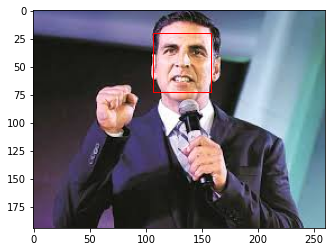

In [9]:
# Get axis handle 
plt.imshow(image)
ax = plt.gca() # Used to get the reference to the current axis i.e plt

# Repeat for all the faces found

for face_location in face_locations:
    
    # Printing the location of each face in the image, where each face is a list of co-ordinates in (top,right,bottom,left) order.
    top, right, bottom, left = face_location ## Gives co-ordinates of the rectangle edges
    x,y,w,h = left, top, right, bottom # Shifting and placing in x and y so that you can use the same values while plotting the box in the next step as the two adjacent sides of the rectangle
    print("A face is located at pixel location Top:{}, Left:{}, Bottom:{}, Right:{}".format(x,y,w,h))
    
    # Drawing the rectangle / box around the face
    rect = Rectangle((x,y),w-x,h-y, fill=False, color='red')
    ax.add_patch(rect) # Used to add a patch in the plot with the reference axis given
    
# Show the output image
plt.show();

In [17]:
# Creating a function for the entire process
def detect_face(image):
    """
    Takes image file.
    Reads an image, detects  the number of faces and eventually pinpoints the location.
    image = file_path
    """
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Finding all the faces in the image
    face_locations = face_recognition.face_locations(img) # This function detects a face in the given image with the help of the slider window operation

    number_of_faces = len(face_locations)
    print("Found {} face(s) in the input image".format(number_of_faces))
    
    # Get axis handle 
    plt.imshow(img)
    ax = plt.gca() # Used to get the reference to the current axis i.e plt

    # Repeat for all the faces found

    for face_location in face_locations:
    
        # Printing the location of each face in the image, where each face is a list of co-ordinates in (top,right,bottom,left) order.
        top, right, bottom, left = face_location ## Gives co-ordinates of the rectangle edges
        x,y,w,h = left, top, right, bottom # Shifting and placing in x and y so that you can use the same values while plotting the box in the next step as the two adjacent sides of the rectangle
        print("A face is located at pixel location Top:{}, Left:{}, Bottom:{}, Right:{}".format(x,y,w,h))
    
        # Drawing the rectangle / box around the face
        rect = Rectangle((x,y),w-x,h-y, fill=False, color='red')
        ax.add_patch(rect) # Used to add a patch in the plot with the reference axis given
    
    # Show the output image
    plt.show();
    
    

Found 3 face(s) in the input image
A face is located at pixel location Top:311, Left:67, Bottom:440, Right:196
A face is located at pixel location Top:10, Left:67, Bottom:139, Right:196
A face is located at pixel location Top:153, Left:82, Bottom:282, Right:211


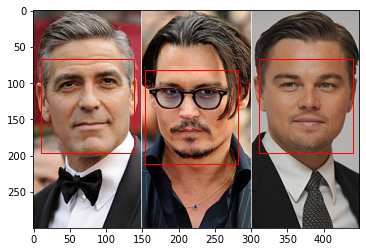

In [19]:
detect_face("images.jpeg")

### Face Recognition

In [20]:
# Loading the known images (Creating a database)

# Akshay Kumar
akshay_kumar = cv2.imread("AK.jpeg")
a_k = cv2.cvtColor(akshay_kumar, cv2.COLOR_BGR2RGB)

# George Clooney
george_clooney = cv2.imread("George.jpeg")
g_l = cv2.cvtColor(george_clooney, cv2.COLOR_BGR2RGB)

# Leonardo di Caprio
leo_cap = cv2.imread("Leo.jpeg")
l_c= cv2.cvtColor(leo_cap, cv2.COLOR_BGR2RGB)

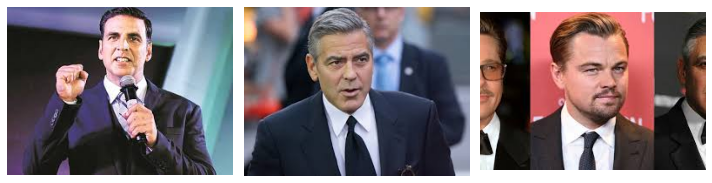

In [52]:
# Displaying the database images

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (10,5))

ax1.imshow(a_k)
ax1.axis("off")
ax2.imshow(g_l)
ax2.axis("off")
ax3.imshow(l_c)
ax3.axis("off")

plt.tight_layout()




In [27]:
# Encoding the face of each person detected in the image. Can fail in the case if there are no faces in the images read.
# Using a pretrained encoder which is open soure
a_k_encoding = face_recognition.face_encodings(a_k)[0] # Writing 0, since the image can contain multiple faces and thus by doing this we are making sure that we extract only the first output image detected.
g_l_encoding = face_recognition.face_encodings(g_l)[0]
l_c_encoding = face_recognition.face_encodings(l_c)[0]

# Creating a database of all the known faces
known_face_encodings = [
    a_k_encoding,
    g_l_encoding,
    l_c_encoding
]

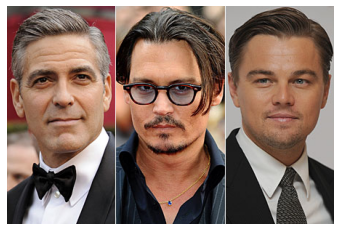

In [53]:
# Now loading the image we want to check 
u_image = cv2.imread("images.jpeg")
u_img = cv2.cvtColor(u_image, cv2.COLOR_BGR2RGB)
plt.imshow(u_img)
plt.axis("off")
# Perform Face Encoding for any faces in the picture fed
unknown_image_encodings = face_recognition.face_encodings(u_img)


In [25]:
from scipy.spatial import distance

In [32]:
# Since the image might contain more than one face, we need to loop over the operation for each face detected
for unknown_image_encoding in unknown_image_encodings:
    
    # Making a list of results of euclidean distance
    results = []
    # Computing the euclidean results
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_image_encoding)
        print("Euclidean Distance: ",d)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold 
    
    name = "Unknown"
    
    # To use face_recognition package, can do a one liner code:
    # results = face_recognition.compare_faces(known_face_encoding, unknown_image_encoding, tolerance=0.6)
    
    if results[0]:
        name = "Akshay Kumar"
    elif results[1]:
        name = "George Clooney"
    elif results[2]:
        name = "Leonardo Di Caprio"
    
    
    print(f"Found {name} in the photo!", end="\n\n")
    
    
    

Euclidean Distance:  0.8527815984973561
Euclidean Distance:  0.9188152631218803
Euclidean Distance:  0.40648279844801444
Found Leonardo Di Caprio in the photo!

Euclidean Distance:  0.6524374020653073
Euclidean Distance:  0.39643000819041746
Euclidean Distance:  0.8771428794526732
Found George Clooney in the photo!

Euclidean Distance:  0.7587302593767233
Euclidean Distance:  0.797304398836664
Euclidean Distance:  0.7169803004702868
Found Unknown in the photo!



### Facial Landmarks

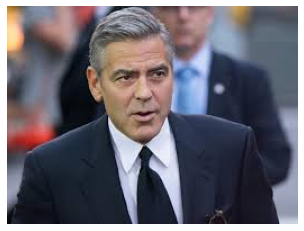

In [62]:
# Loading a Leo image as previous
image = cv2.imread("George.jpeg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off");


In [63]:
# Finding all facial features in all the faces present in the image
# The following function identifies all the facial landmarks
face_landmarks_list = face_recognition.face_landmarks(img) # It generates facial landmarks for all th faces identified in the image

In [66]:
# The output that face_landmark actually gives
x,y = face_landmarks_list[0]["left_eyebrow"][0]
x,y


(92, 62)

Here, the output of the landmarks is a list of tuples of x,y co-ordinates, basically different points over a particular facial feature. (like a locus)

In [3]:
import matplotlib.lines as mlines 
from matplotlib.patches import Polygon

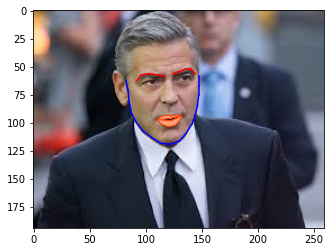

In [81]:
import matplotlib.lines as mlines # mline plots a line over a desired path, basically a line over all the sepecified desired points


plt.imshow(img)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    # The face landmark detection model returns the following features:
    # - chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, bottom_lip
    
    # Drawing line over the eyebrows
    left_eyebrows_pts = face_landmarks["left_eyebrow"]
    pre_x, pre_y = left_eyebrows_pts[0] # Doint this tpo seperate out the first point of the line so that we can use
    # it to intialise the x and y co-ords
    for (x,y) in left_eyebrows_pts[1:]:
        l = mlines.Line2D([pre_x,x],[pre_y,y], color="red") # Basically, the x data is (starting x co-ord, ending x co-ord of line)
        ax.add_line(l)# Adding a line to the plot           # Similarly for the y data, where the starting co-ords are x and y initailised before
        pre_x,pre_y = x,y # Reinitialising the co-ords and this time starting from the point where the previous line left of to give a continued line and thus a locus
        
    # Drawing line over the eyebrows
    right_eyebrows_pts = face_landmarks["right_eyebrow"]
    pre_x, pre_y = right_eyebrows_pts[0] # Doint this tpo seperate out the first point of the line so that we can use
    # it to intialise the x and y co-ords
    for (x,y) in right_eyebrows_pts[1:]:
        l = mlines.Line2D([pre_x,x],[pre_y,y], color="red") # Basically, the x data is (starting x co-ord, ending x co-ord of line)
        ax.add_line(l)# Adding a line to the plot           # Similarly for the y data, where the starting co-ords are x and y initailised before
        pre_x,pre_y = x,y    
        
    # Drawing a line over the chin
    chin_pts = face_landmarks["chin"]
    pre_x, pre_y = chin_pts[0]
    for (x,y) in chin_pts[1:]:
        l = mlines.Line2D([pre_x,x],[pre_y,y], color='blue')
        ax.add_line(l)
        pre_x, pre_y = x,y 
        
        
    p = Polygon(face_landmarks['top_lip'], facecolor="lightsalmon", edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor="lightsalmon", edgecolor='orangered')
    ax.add_patch(p)
    
plt.show()
ax.axis("off");
    
    

Assignment Complete,
Thank You